# Analise de Dados da Pandemia de Covid-19 nos Estados Brasileiros 

In [121]:
import datetime
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import json
import folium 
from folium import plugins
from IPython.display import Image

In [122]:
covid = pd.read_csv('caso_full.csv.gz', index_col='date', parse_dates=True)
covid.head()

,city,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
date,,,,,,,,,,,,,,,,,
2020-03-17,Rio Branco,1200401.0,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
2020-03-17,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2020-03-18,Rio Branco,1200401.0,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
2020-03-18,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
2020-03-19,Rio Branco,1200401.0,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


In [123]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2157616 entries, 2020-03-17 to 2021-05-29
Data columns (total 17 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   city                                           object 
 1   city_ibge_code                                 float64
 2   epidemiological_week                           int64  
 3   estimated_population                           float64
 4   estimated_population_2019                      float64
 5   is_last                                        bool   
 6   is_repeated                                    bool   
 7   last_available_confirmed                       int64  
 8   last_available_confirmed_per_100k_inhabitants  float64
 9   last_available_date                            object 
 10  last_available_death_rate                      float64
 11  last_available_deaths                          int64  
 12  order_for_place            

In [124]:
covid.describe()

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
count,2.149708e+06,2.157616e+06,2.149708e+06,2.149708e+06,2.157616e+06,2.134189e+06,2.157616e+06,2.157616e+06,2.157616e+06,2.157616e+06,2.157616e+06
mean,3.220793e+06,2.020649e+05,8.548737e+04,8.483416e+04,2.459064e+03,2.868470e+03,2.860583e-02,6.731448e+01,1.937657e+02,1.521659e+01,4.261430e-01
std,1.010631e+06,3.737907e+01,9.378841e+05,9.311073e+05,3.131321e+04,3.090803e+03,6.502623e-02,9.743814e+02,1.128616e+02,2.127765e+02,7.124686e+00
min,1.100000e+01,2.020090e+05,7.760000e+02,7.810000e+02,0.000000e+00,2.160000e-03,0.000000e+00,0.000000e+00,1.000000e+00,-2.327500e+04,-4.070000e+02
25%,2.508000e+06,2.020330e+05,5.720000e+03,5.714000e+03,5.000000e+01,6.074858e+02,6.800000e-03,1.000000e+00,9.700000e+01,0.000000e+00,0.000000e+00
50%,3.143609e+06,2.020470e+05,1.245200e+04,1.240700e+04,2.060000e+02,1.950867e+03,1.790000e-02,4.000000e+00,1.930000e+02,0.000000e+00,0.000000e+00
75%,4.116406e+06,2.021080e+05,2.761700e+04,2.744600e+04,6.810000e+02,4.142336e+03,3.070000e-02,1.400000e+01,2.890000e+02,3.000000e+00,0.000000e+00
max,5.300108e+06,2.021210e+05,4.628933e+07,4.591905e+07,3.254893e+06,9.048099e+05,1.000000e+00,1.111230e+05,4.600000e+02,4.502000e+04,1.389000e+03


In [125]:
covid_estados = covid[covid.place_type == 'state']
covid_estados.head()

,city,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
date,,,,,,,,,,,,,,,,,
2020-03-17,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2020-03-18,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
2020-03-19,NaN,12.0,202012,894470.0,881935.0,False,False,4,0.44719,2020-03-19,0.0,0,3,state,AC,1,0
2020-03-20,NaN,12.0,202012,894470.0,881935.0,False,False,7,0.78259,2020-03-20,0.0,0,4,state,AC,3,0
2020-03-21,NaN,12.0,202012,894470.0,881935.0,False,False,11,1.22978,2020-03-21,0.0,0,5,state,AC,4,0


In [126]:
casos_total = covid_estados.new_confirmed.sum()
obitos_total = covid_estados.new_deaths.sum()
print(f'Total de Casos confirmados de Covid-19 no Brasil até {covid.index[-1]}: {casos_total}')
print(f'Total de Mortes confirmadas por Covid-19 no Brasil até {covid.index[-1]}: {obitos_total}')

Total de Casos confirmados de Covid-19 no Brasil até 2021-05-29 00:00:00: 16476623
Total de Mortes confirmadas por Covid-19 no Brasil até 2021-05-29 00:00:00: 461289


# Casos Confirmados por Unidade Federativa

In [127]:
casos_por_estados = covid_estados.groupby('state')['new_confirmed'].sum()
casos_por_estados = casos_por_estados.sort_values(ascending=False)
casos_por_estados = pd.DataFrame(casos_por_estados)
casos_por_estados

,new_confirmed
state,
SP,3254893
MG,1564200
PR,1089777
RS,1082746
BA,1010166
SC,965277
RJ,858949
CE,797953
GO,607062


# Óbitos confirmados por Unidade Federativa

In [128]:
obitos_por_estados = covid_estados.groupby('state')['new_deaths'].sum()
obitos_por_estados = obitos_por_estados.sort_values(ascending=False)
obitos_por_estados = pd.DataFrame(obitos_por_estados)
obitos_por_estados

,new_deaths
state,
SP,111123
RJ,50550
MG,40262
RS,28105
PR,26370
BA,21074
CE,20440
GO,16994
PE,15742


# Evolução Diária da Pandemia

In [129]:
evolucao_diaria = covid_estados.groupby(covid_estados.index)[['new_confirmed', 'new_deaths']].sum()
evolucao_diaria.tail()

,new_confirmed,new_deaths
date,,
2021-05-25,74041,2184
2021-05-26,80245,2463
2021-05-27,64531,2101
2021-05-28,53530,2426
2021-05-29,73012,1865


# Média Móvel de Casos e Óbitos confirmados

In [130]:
evolucao_diaria['moving_average_cases'] = evolucao_diaria.new_confirmed.rolling(window=8).mean()
evolucao_diaria['moving_average_deaths'] = evolucao_diaria.new_deaths.rolling(window=8).mean()
evolucao_diaria.tail()

,new_confirmed,new_deaths,moving_average_cases,moving_average_deaths
date,,,,
2021-05-25,74041,2184,66624.750,1906.125
2021-05-26,80245,2463,67304.750,1907.625
2021-05-27,64531,2101,65338.250,1857.750
2021-05-28,53530,2426,61606.125,1847.125
2021-05-29,73012,1865,61153.750,1814.500


Text(0.5, 1.0, 'Casos Acumulados de covid-19 no Brasil')

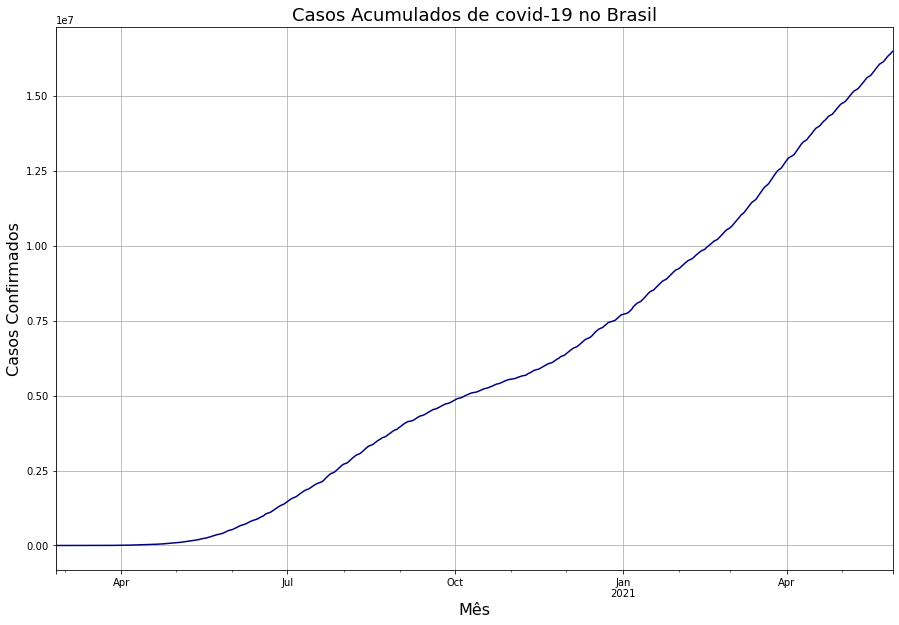

In [131]:
fig = plt.figure(figsize=(15, 10))
evolucao_diaria.new_confirmed.cumsum().plot(grid=True, kind='line', color='#000082')
plt.xlabel('Mês', fontsize=16)
plt.ylabel('Casos Confirmados', fontsize=16)
plt.title('Casos Acumulados de covid-19 no Brasil', fontsize=18)

Text(0.5, 1.0, 'Óbitos acumulados de covid-19 no Brasil')

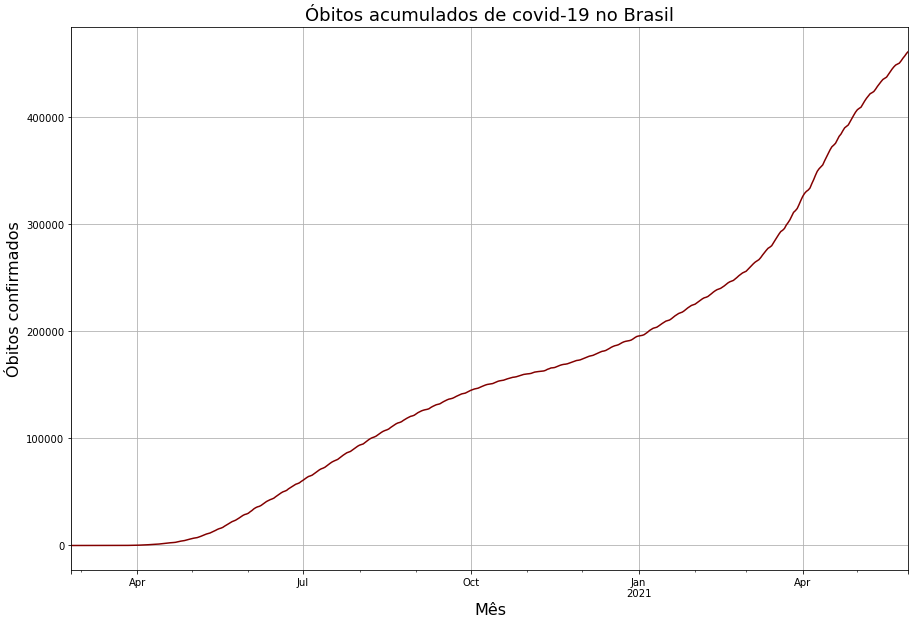

In [132]:
fig = plt.figure(figsize=(15, 10))
evolucao_diaria.new_deaths.cumsum().plot(grid=True, kind='line', color='#820000')
plt.xlabel('Mês', fontsize=16)
plt.ylabel('Óbitos confirmados', fontsize=16)
plt.title('Óbitos acumulados de covid-19 no Brasil', fontsize=18)

Text(0.5, 1.0, 'Casos Confirmados x Média Móvel de Casos Confirmados por Covid-19 no Brasil')

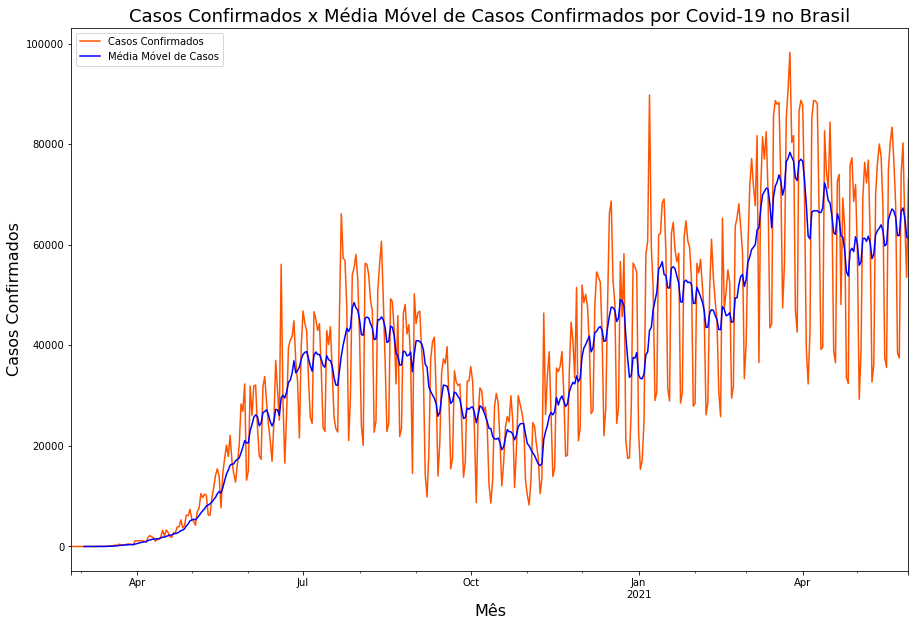

In [133]:
fig = plt.figure(figsize=(15, 10))
evolucao_diaria.new_confirmed.plot(kind="line", color='#ff5300')
evolucao_diaria.moving_average_cases.plot(kind='line', color='b')
plt.xlabel('Mês', fontsize=16)
plt.ylabel('Casos Confirmados', fontsize=16)
plt.legend(['Casos Confirmados', 'Média Móvel de Casos'], loc='best')
plt.title('Casos Confirmados x Média Móvel de Casos Confirmados por Covid-19 no Brasil', fontsize=18)

Text(0.5, 1.0, 'Óbitos confirmados x Média móvel de Obitos confirmados por Covid-19 no Brasil')

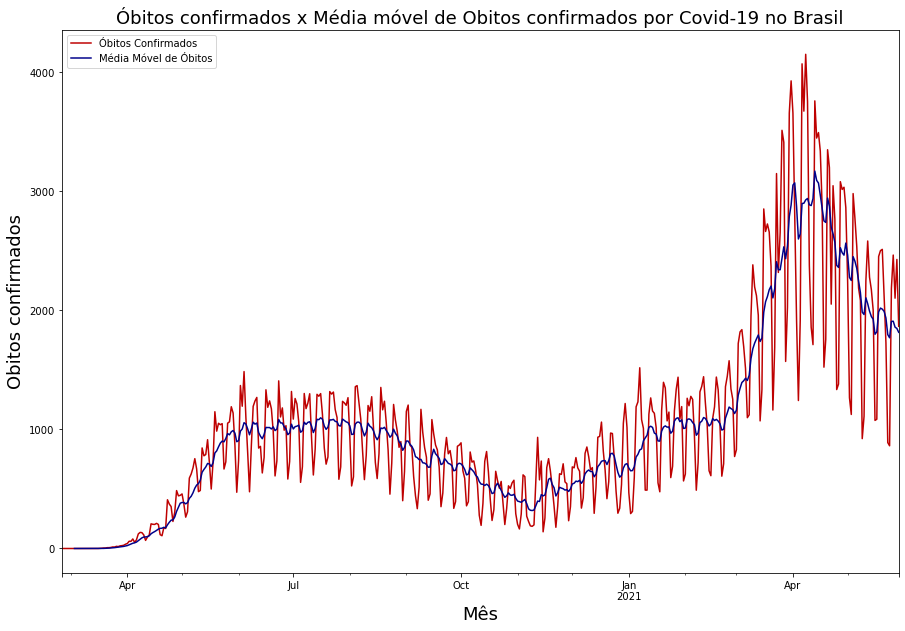

In [134]:
fig = plt.figure(figsize=(15, 10))
evolucao_diaria.new_deaths.plot(kind='line', color='#be0101')
evolucao_diaria.moving_average_deaths.plot(kind='line', color='#00018a')
plt.xlabel('Mês', fontsize=18)
plt.ylabel('Obitos confirmados', fontsize=18)
plt.legend(['Óbitos Confirmados', 'Média Móvel de Óbitos'], loc='best')
plt.title('Óbitos confirmados x Média móvel de Obitos confirmados por Covid-19 no Brasil', fontsize=18)

In [135]:
estados = 'states.json'
geo_json_data = json.load(open(estados))

In [136]:
casos_por_estados = np.log(casos_por_estados.new_confirmed)
obitos_por_estados = np.log(obitos_por_estados.new_deaths)

In [137]:
# Cria um Mapa
mapa1 = folium.Map(width=800,
                  height=600,
                  location=[-15.77972, -47.92972],
                  zoom_start=4)

# Cria um mapa 
mapa2 = folium.Map(width=800,
                  height=600,
                  location=[-15.77972, -47.92972],
                  zoom_start=4)

In [138]:
mapa1.choropleth(
    geo_data = geo_json_data,
    name = 'Casos de Covid-19 por UF',
    data = casos_por_estados,
    columns=[casos_por_estados.index, 'new_confirmed'],
    key_on = 'feature.id',
    fill_color='OrRd',
    fill_opacity=0.8,
    legend_name = 'Casos Confirmados por UF',
    line_color='black',
    line_opacity=0.5,
    show='png')

mapa2.choropleth(
    geo_data = geo_json_data,
    name = 'Obitos de Covid-19 por UF',
    data = obitos_por_estados,
    columns=[obitos_por_estados.index, 'new_deaths'],
    key_on = 'feature.id',
    fill_color='Reds',
    fill_opacity=0.8,
    legend_name = 'Óbitos Confirmados por UF',
    line_color='black',
    line_opacity=0.5,
    show='png')

C:\Users\vinic\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


# Estados com os maiores indíces de casos confirmados por covid-19

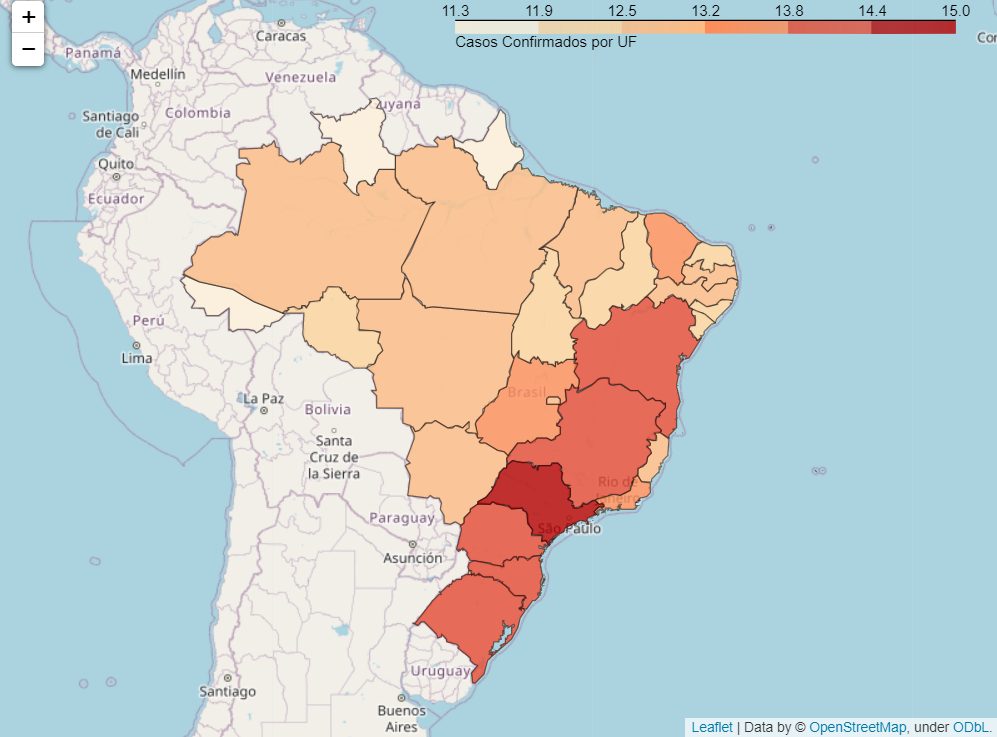

In [139]:
Image(filename='C:/Users/vinic/GitHub/data_analysis/Análise de Dados da Covid-19/Images/casos_por_estado.png')

# Estados com os maiores indíces de óbitos confirmados por covid-19

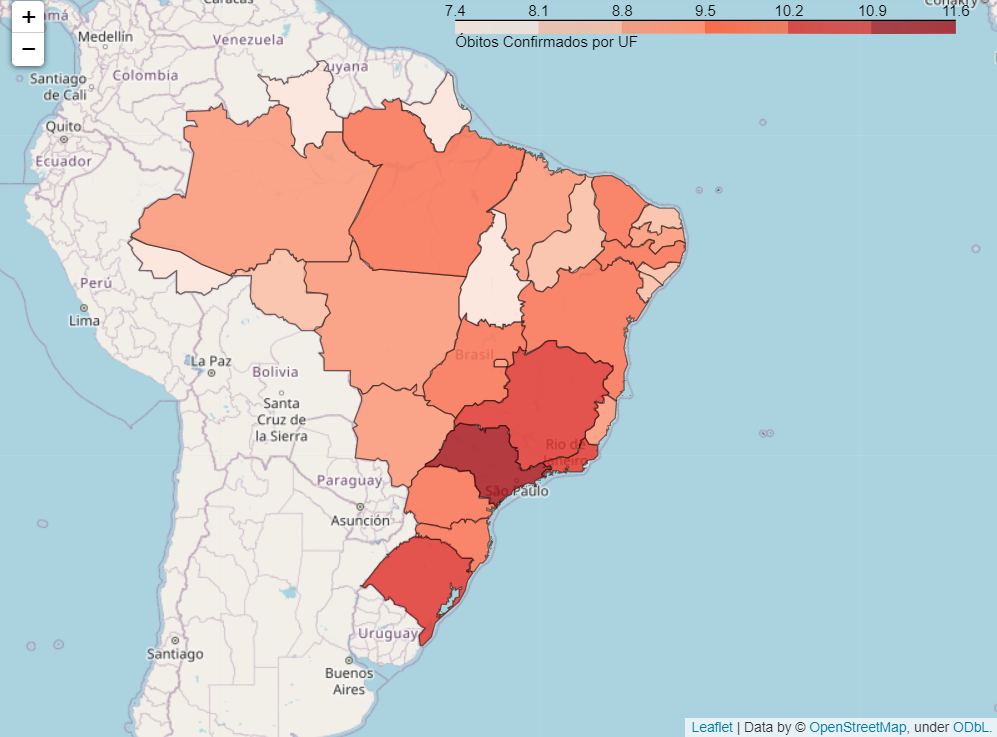

In [140]:
Image(filename='C:/Users/vinic/GitHub/data_analysis/Análise de Dados da Covid-19/Images/obitos_por_estado.png')